# Seaborn main plotting functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Figure-Level vs. Axes-Level Functions in Seaborn

#### 1. Figure-Level Functions: `relplot`, `displot`, `catplot`
- Create an **entire figure** with subplots automatically.
- Return a **FacetGrid** or similar object, not an `ax`.
- Support `col`, `row`, and `hue` for faceting.


#### 2. Axes-Level Functions: `scatterplot`, `lineplot`, etc.
- Work on a **specific Matplotlib Axes**.
- Require an explicit `ax` for embedding in figures.
- Return an `ax` object, modifiable with Matplotlib.

#### Relationship between Figure-Level Functions and Axes-Level Functions
`relplot` (relational)
- `scatterplot`
- `lineplot`

`displot` (distributions)
- `histplot`
- `kdeplot`
- `ecdfplot`
- `rugplot`

`catplot` (categorical)
- `stripplot`
- `swarmplot`
- `boxplot`
- `violinplot`
- `barplot`

#### Key Differences

| Feature            | Figure-Level (`sns.catplot()`, etc.) | Axes-Level (`sns.boxplot()`, etc.) |
|--------------------|----------------------------------|----------------------------------|
| Creates figure?    | ✅ Yes                           | ❌ No, needs `plt.subplots()` |
| Returns           | `FacetGrid`, `PairGrid`, etc.   | `Axes` object                 |
| Supports multiple subplots? | ✅ Yes (`col`, `row`, `hue`) | ❌ No, must use `plt.subplots()` |
| Places legend inside of `ax`? | ❌ No | ✅ Yes |


# Categorical plots

## `stripplot` and `catplot`

`stripplot` displays individual data points in a scatter-like format along a categorical axis.  
  - Points may overlap, potentially obscuring data density.
  - Best for small datasets or when jitter is applied to reduce overlap.

In [2]:
tips = sns.load_dataset('tips')

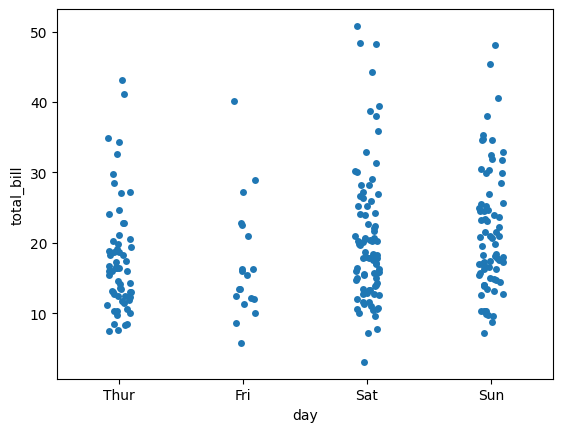

In [3]:
sns.stripplot(data=tips, x="day", y="total_bill");

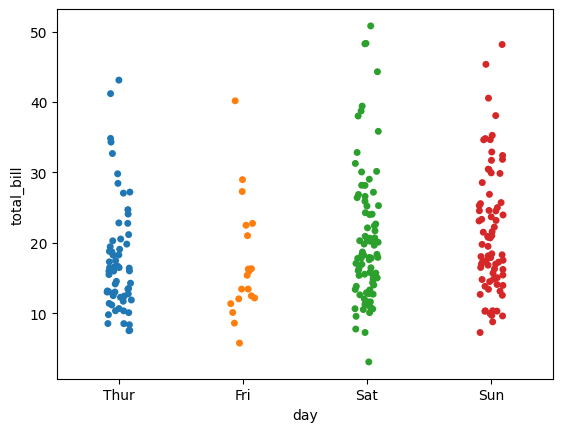

In [4]:
sns.stripplot(data=tips, x="day", y="total_bill", hue="day", legend=False);

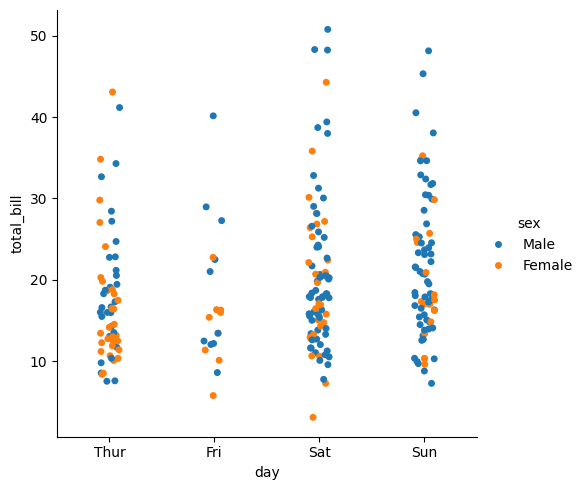

In [5]:
sns.catplot(data=tips, y="total_bill", x="day", hue="sex");

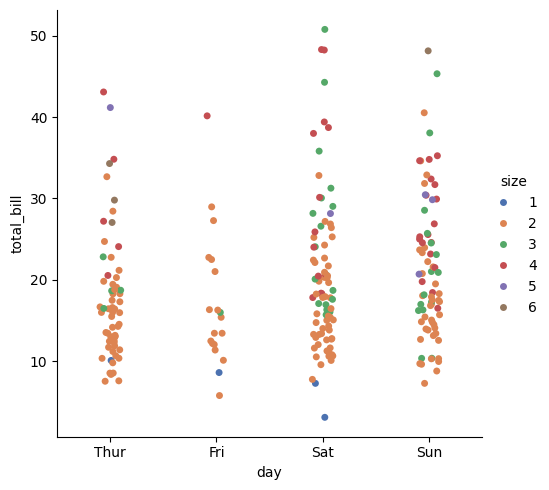

In [6]:
sns.catplot(data=tips, y="total_bill", x="day", hue="size", palette="deep");

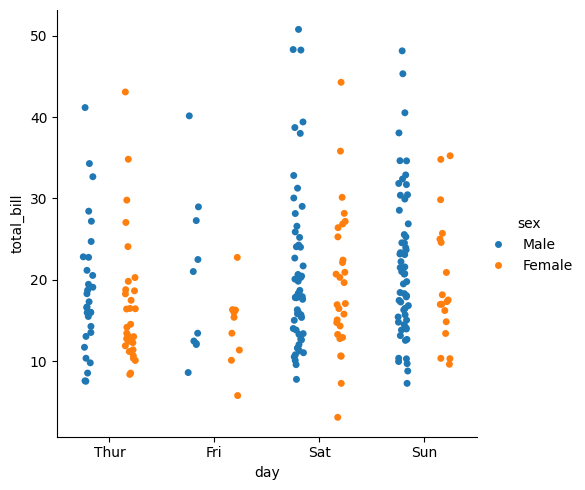

In [7]:
sns.catplot(data=tips, y="total_bill", x="day", hue="sex", dodge=True);

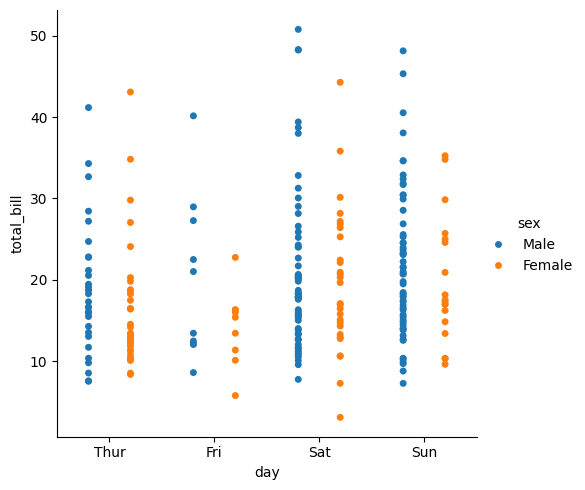

In [8]:
sns.catplot(data=tips, y="total_bill", x="day", hue="sex", dodge=True, jitter=False);

We can play with it:

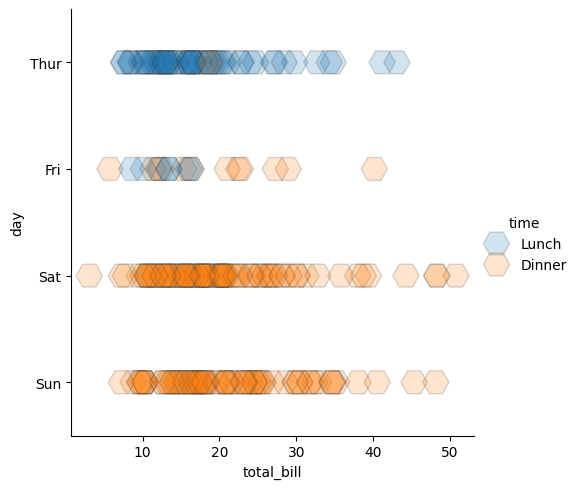

In [9]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="time",
    jitter=False, s=360, marker="H", linewidth=1, alpha=.2,
);

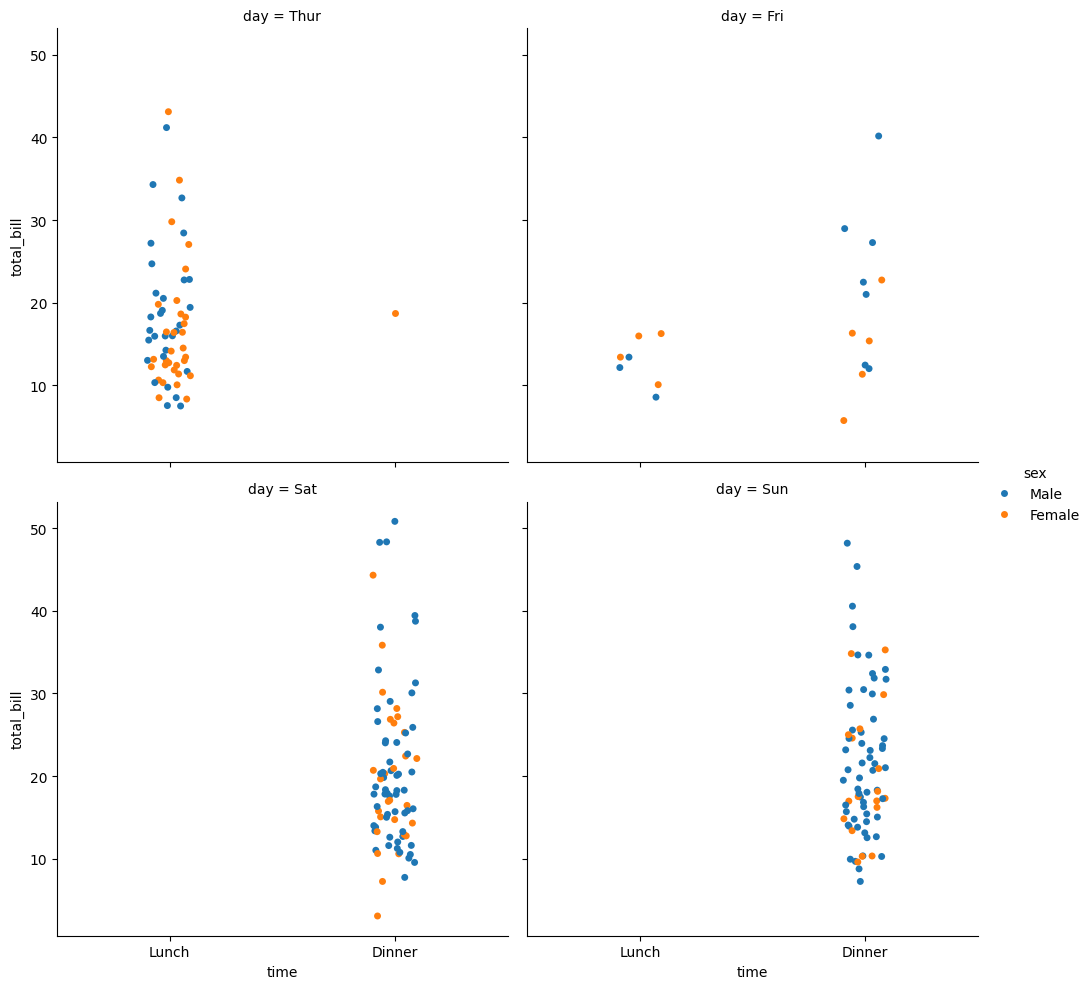

In [10]:
sns.catplot(data=tips, x="time", y="total_bill", hue="sex", col="day", col_wrap=2);

## `swarmplot`

`swarmplot()` is imilar to `stripplot()`, but better adjusts points to avoid overlap.  
  - Preserves data density while maintaining readability.
  - Suitable for moderate-sized datasets where avoiding point collision is crucial.

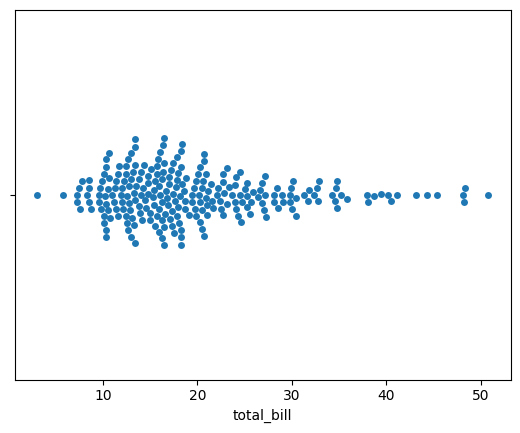

In [11]:
sns.swarmplot(data=tips, x="total_bill");

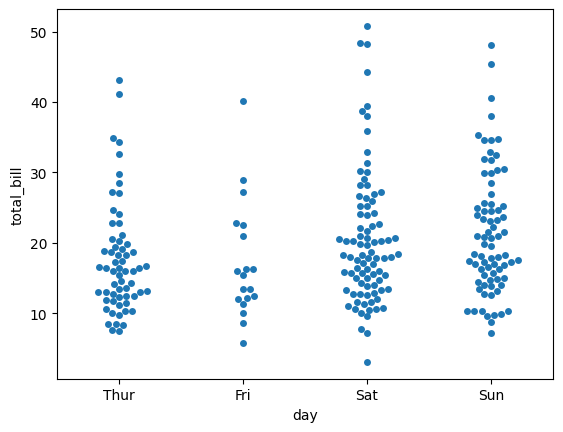

In [12]:
sns.swarmplot(data=tips, y="total_bill", x="day");

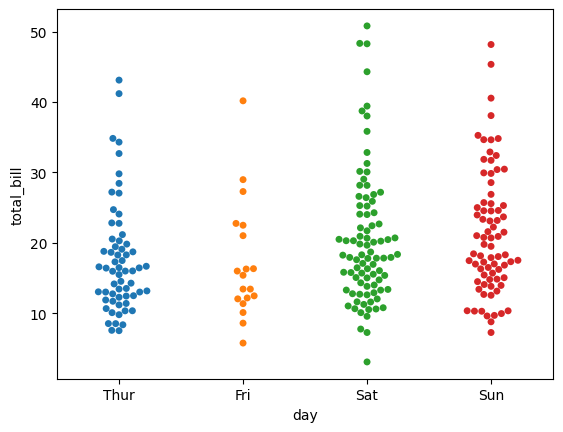

In [13]:
sns.swarmplot(data=tips, y="total_bill", x="day", hue="day");

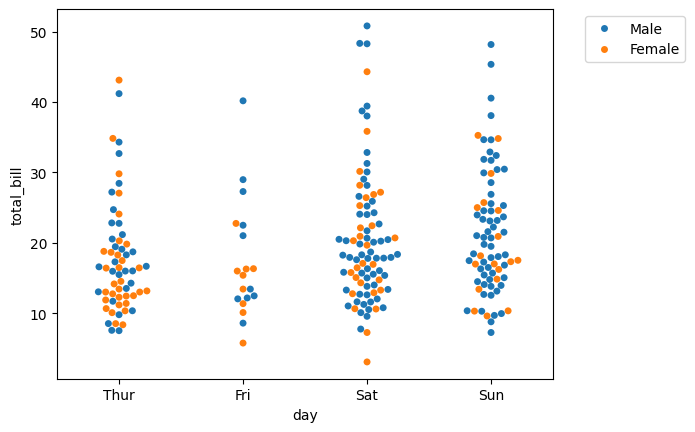

In [14]:
ax = sns.swarmplot(data=tips, y="total_bill", x="day", hue="sex");
ax.legend(bbox_to_anchor = (1.05,1), loc = 'upper left');

#### Making it more stylish

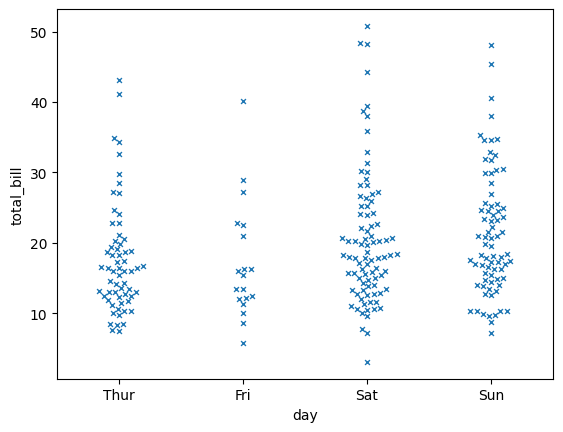

In [15]:
sns.swarmplot(
    data=tips, y="total_bill", x="day",
    marker="x", linewidth=1, size=3.5
);

#### Plotting multiples

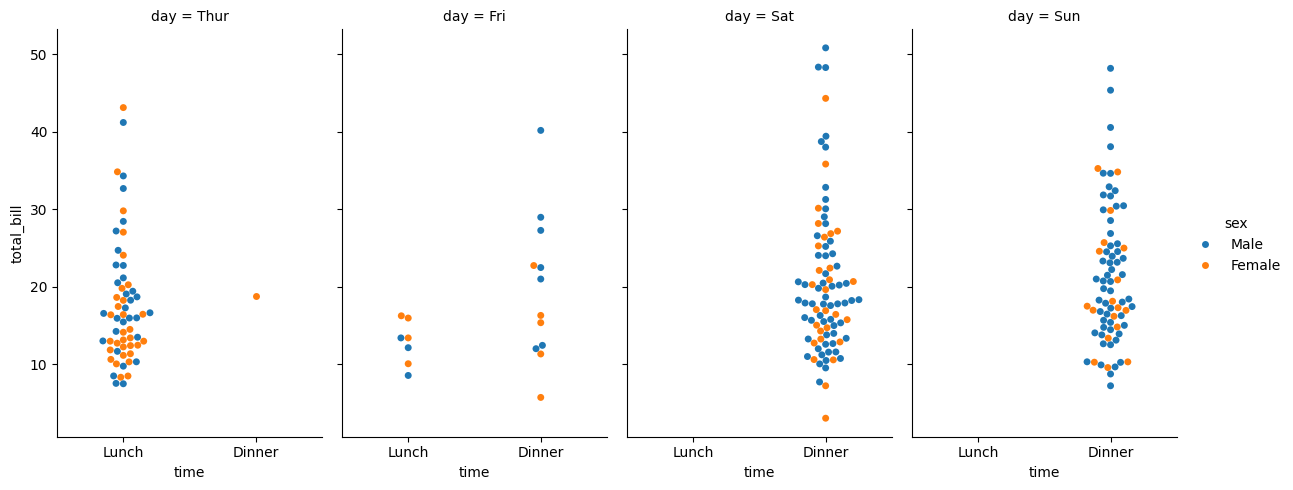

In [16]:
sns.catplot(
    data=tips, x="time", y="total_bill", hue="sex", col="day",
    aspect=.6, kind="swarm"
);

## `violinplot`

Violinplot represents a distribution two ways: a patch showing a symmetric kernel density estimate (KDE), and the quartiles / whiskers of a box plot.

In [17]:
df = sns.load_dataset("titanic")
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
207,1,3,male,26.0,0,0,18.7875,C,Third,man,True,NaN,Cherbourg,yes,True
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False


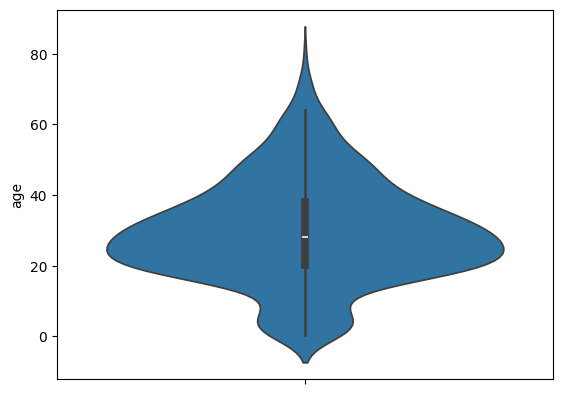

In [18]:
sns.violinplot(y=df["age"]);

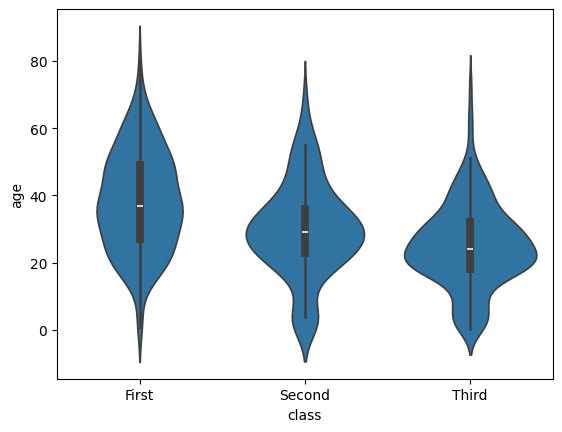

In [19]:
sns.violinplot(data=df, y="age", x="class");

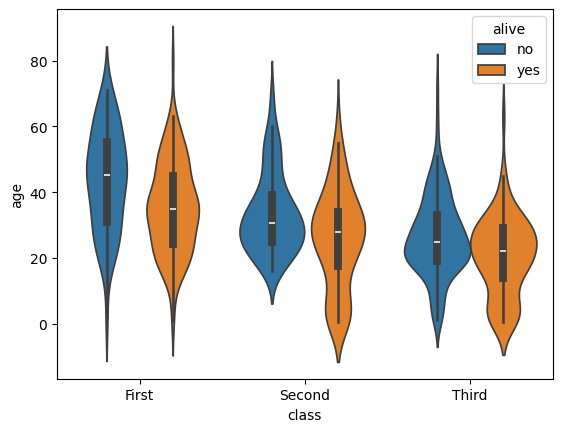

In [20]:
sns.violinplot(data=df, x="class", y="age", hue="alive");

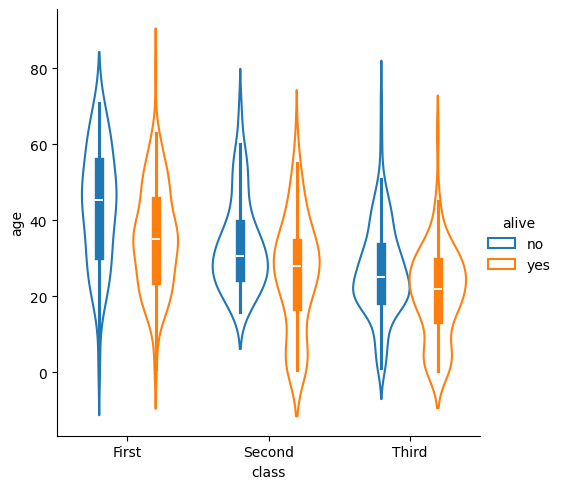

In [21]:
sns.catplot(data=df, x="class", y="age", hue="alive", fill=False, kind="violin");

#### Compact Violin Plots

Draw "split" violins to conserve space and display only data quartiles.  
Best suited for binary `hue` values.

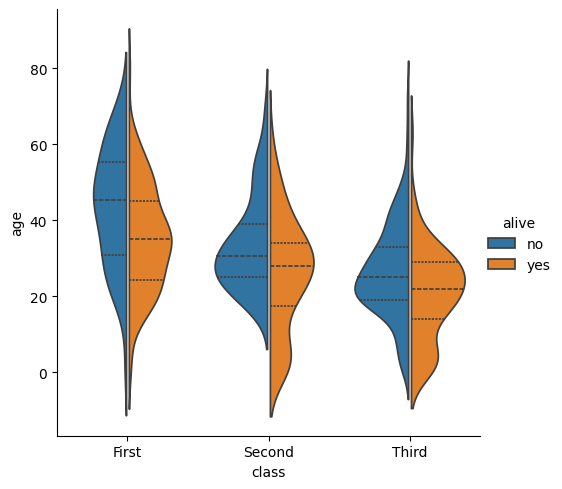

In [53]:
sns.catplot(data=df, x="class", y="age", hue="alive", gap=.05, split=True, inner="quart", kind="violin");

The `inner` parameter in **violin plots** controls the appearance of **data points** inside each violin. It determines what is displayed within the distribution shape.

#### Available `inner` Options:
- **`"box"`** – Displays a **miniature boxplot** inside each violin (default).
- **`"quart"`** – Draws horizontal lines at the **quartiles (25th, 50th, and 75th percentiles)**.
- **`"point"`** – Shows individual **data points** inside the violin.
- **`"stick"`** – Displays **vertical lines** for each observation.
- **`None`** – Removes any internal markings, leaving only the violin shape.

#### How `inner` Affects the Plot
- **`"quart"`** (used in your example) highlights **central tendencies** without overwhelming the visualization.
- **`"box"`** adds a **boxplot** for better statistical insights.
- **`"point"`** or `"stick"` can be useful for **smaller datasets** to show individual values.

#### Best Use Cases
- **`"box"`** – When comparing distributions **with summary statistics**.
- **`"quart"`** – When emphasizing **percentiles and medians**.
- **`"point"` / `"stick"`** – When dealing with **small datasets** to show actual observations.
- **`None`** – When focusing **only on density distribution**.



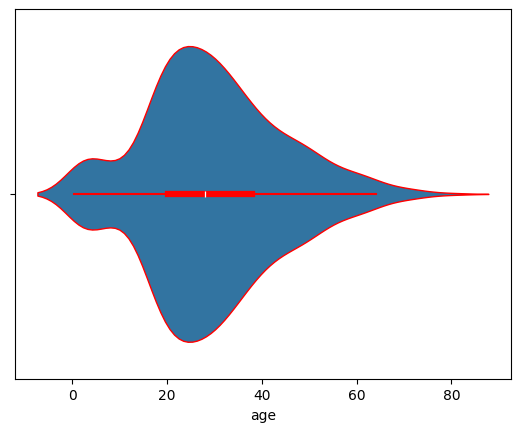

In [23]:
sns.violinplot(data=df, x="age", linewidth=1, linecolor="red");

Use `inner_kws` to pass parameters directly to the inner plotting functions.

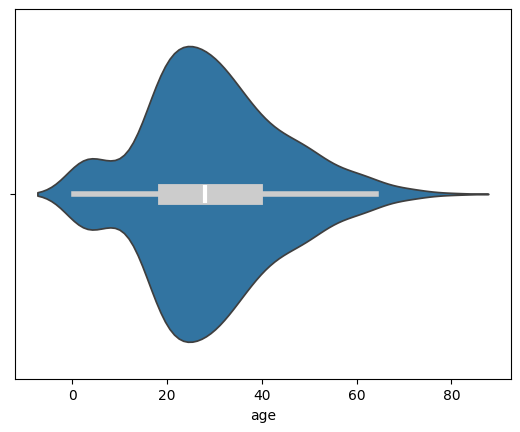

In [24]:
sns.violinplot(data=df, x="age", inner_kws=dict(box_width=15, whis_width=4, color=".8"));
# `whis_width` parameter controls the width of the whisker caps

## `violinplot` goes well together with `swarmplot`

It can be useful to combine `swarmplot()` with a violin plot to show each observation alongside a summary of the distribution.

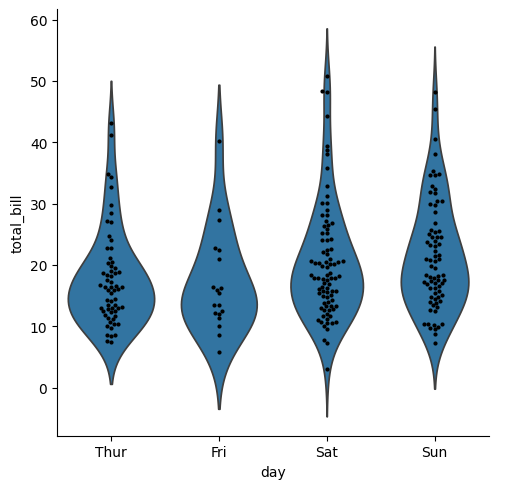

In [25]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax);

It often looks better than

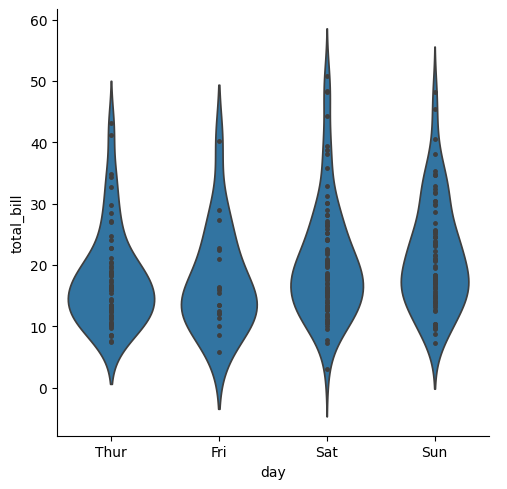

In [57]:
sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner='point');

## `boxplot`

A **box plot** (or **box-and-whisker plot**) visualizes the distribution of quantitative data, making it easy to compare variables or categorical levels.  

- The **box** represents the quartiles of the dataset.  
- The **whiskers** extend to cover the remaining distribution, *excluding outliers*.  
- Outliers are identified using a method based on the *interquartile range (IQR)*.

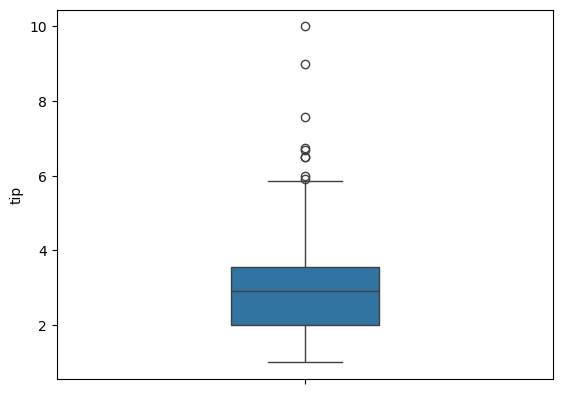

In [26]:
sns.boxplot(y=tips["tip"], width=0.3);

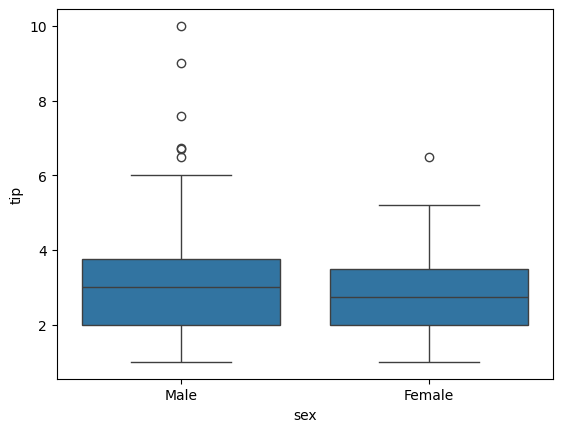

In [27]:
sns.boxplot(data=tips, x="sex", y="tip");

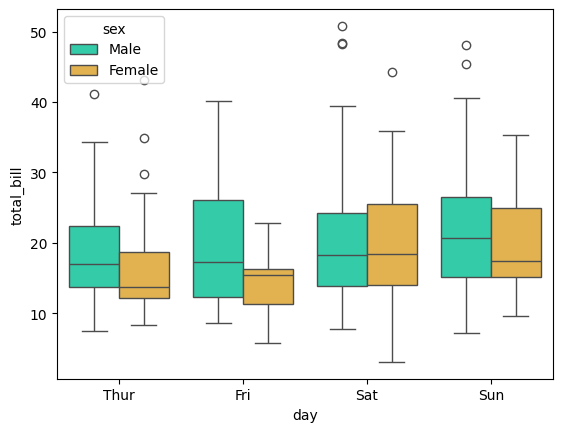

In [28]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", palette='turbo');

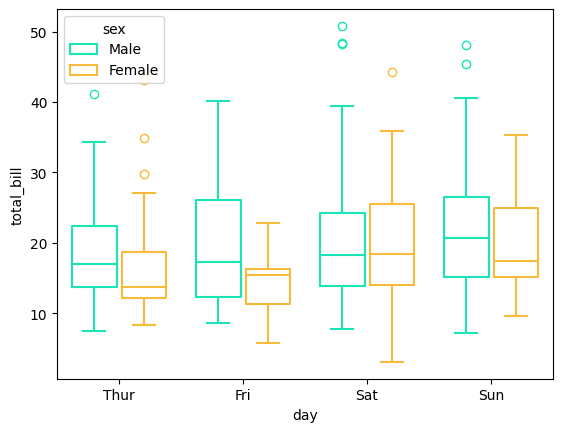

In [29]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", palette='turbo', fill=False, gap=.1);

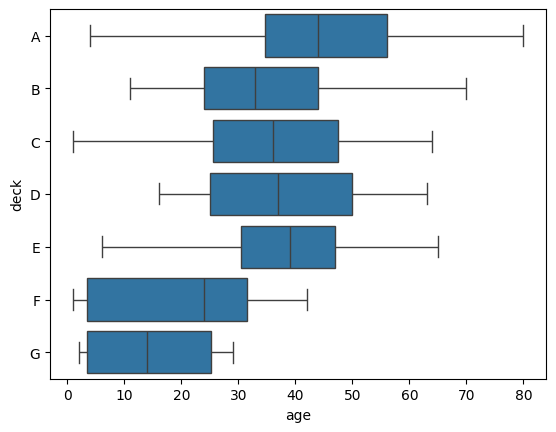

In [30]:
titanic = sns.load_dataset('titanic')
sns.boxplot(data=titanic, x="age", y="deck", whis=(0, 100));

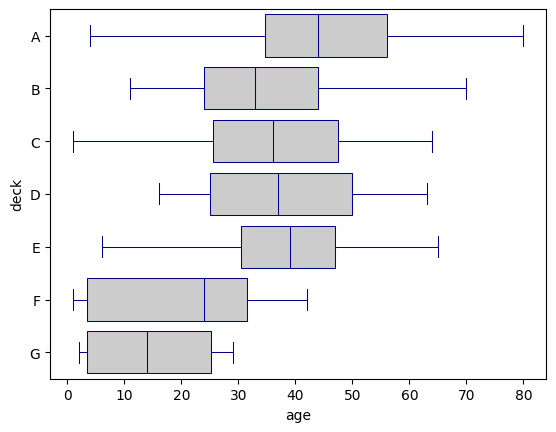

In [31]:
sns.boxplot(data=titanic, x="age", y="deck", color=".8", linecolor="darkblue", linewidth=.75);

#### Let's make it beautiful

<Axes: xlabel='age', ylabel='class'>

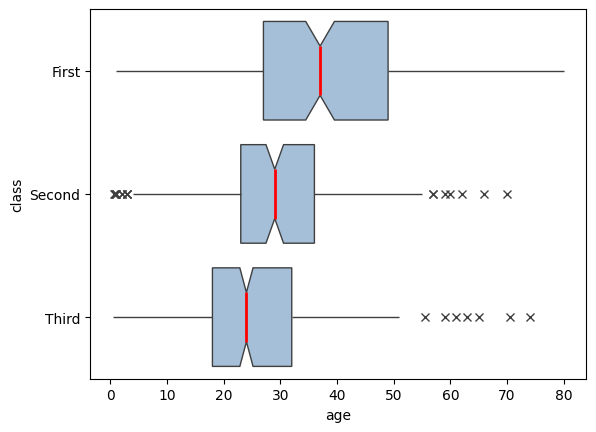

In [32]:
sns.boxplot(
    data=titanic, x="age", y="class",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

## `barplot`

`barplot` visualizes an aggregate or statistical estimate of a numeric variable, with the **height** of each bar representing the estimate and **error bars** indicating uncertainty.  

- The **y-axis** includes **0** by default, making bar plots ideal when **0 is a meaningful reference point**.  
- Bar plots effectively highlight comparisons between categories.


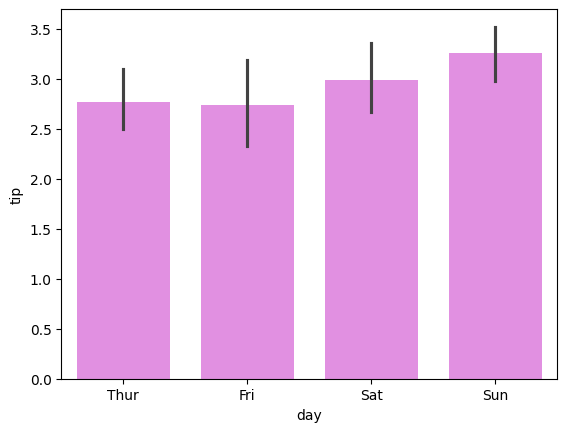

In [33]:
# sns.barplot(tips, x="day", y="tip", errorbar=None);
sns.barplot(tips, x="day", y="tip", errorbar=("ci", 95), color='violet', width=0.75);

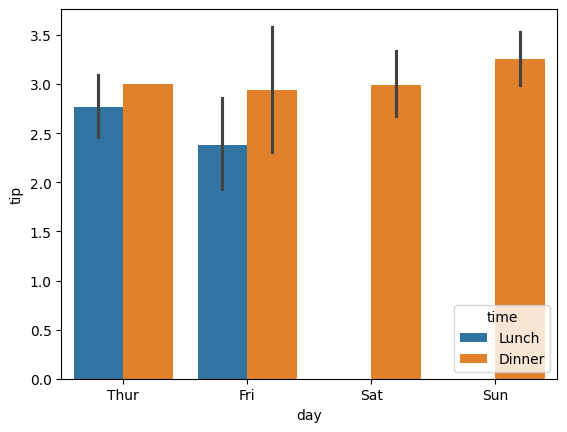

In [34]:
sns.barplot(tips, x="day", y='tip', hue='time');

By default, `barplot()` computes the **mean** of the numerical variable for each category:

You can modify `estimator` to apply different summary statistics:

- `estimator=sum` – Displays the total sum of values for each category.
- `estimator=np.median` – Shows the median instead of the mean.
- `estimator=len` – Counts the number of observations per category.

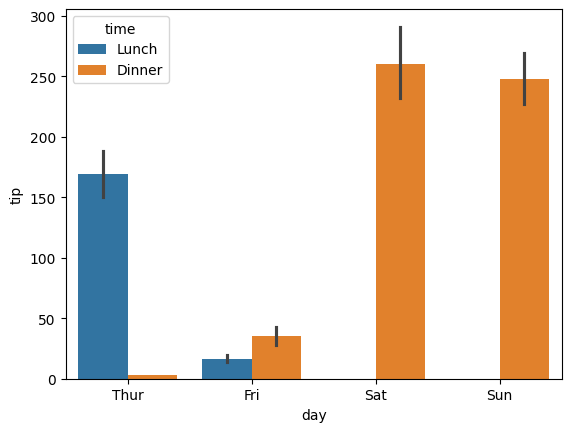

In [35]:
sns.barplot(tips, x="day", y='tip', hue='time', estimator='sum');

Add text labels with each bar's value:

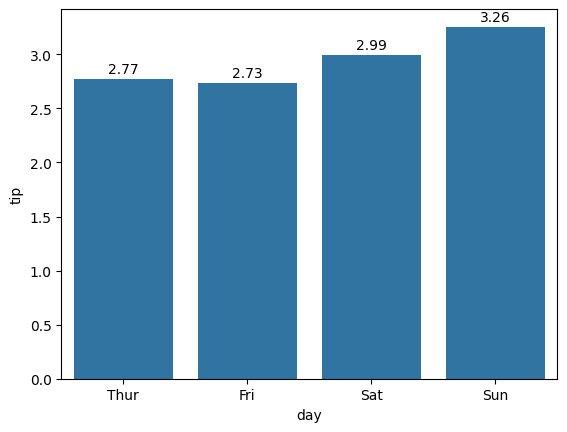

In [36]:
ax = sns.barplot(tips, x="day", y="tip", errorbar=None);
ax.bar_label(ax.containers[0],  fmt='%.2f', fontsize=10, padding=2);

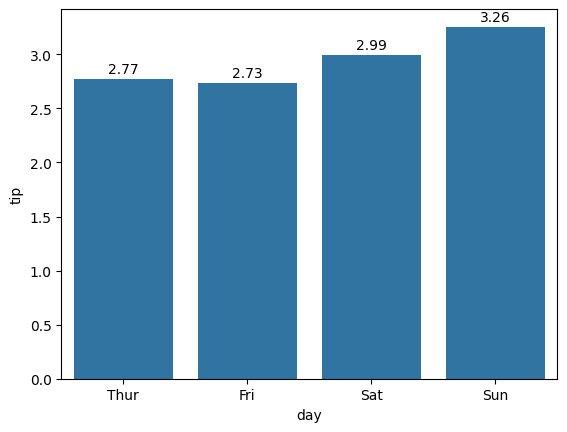

In [37]:
# More robust code

ax = sns.barplot(tips, x="day", y="tip", errorbar=None);
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=2)

Have fun:

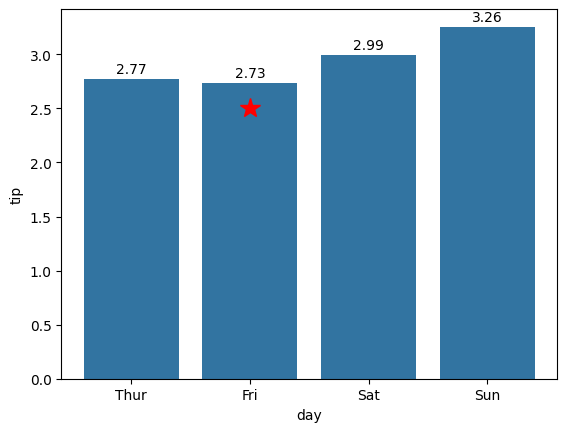

In [38]:
ax = sns.barplot(tips, x="day", y="tip", errorbar=None)
ax.bar_label(ax.containers[0], fmt="%.2f", fontsize=10, padding=2)

ax.plot(1, 2.5, "*", markersize=15, color="r");

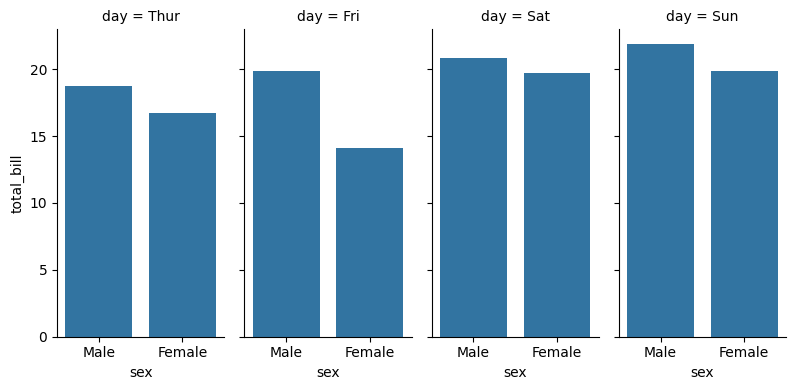

In [39]:
sns.catplot(
    tips, kind="bar",
    x="sex", y="total_bill", col="day",
    height=4, aspect=.5,errorbar=None
);

# `PairGrid`

PairGrid is a powerful tool for visualizing relationships between multiple numerical variables in a dataset. It allows flexible customization of different plots for different sections of the grid.

PairGrid creates a grid of subplots where each subplot represents a combination of two variables.
It provides complete control over what type of plots are drawn in the diagonal, upper, and lower sections of the grid.

**Methods:**
- `map(func)`: Apply a function to all plots.
- `map_upper(func)`: Apply to upper triangle.
- `map_lower(func)`: Apply to lower triangle.
- `map_diag(func)`: Apply to diagonal plots.
- `map_offdiag(func)`: Apply to lower and upper triangles.
- `add_legend()`: Add a legend.

In [40]:
penguins = sns.load_dataset("penguins")

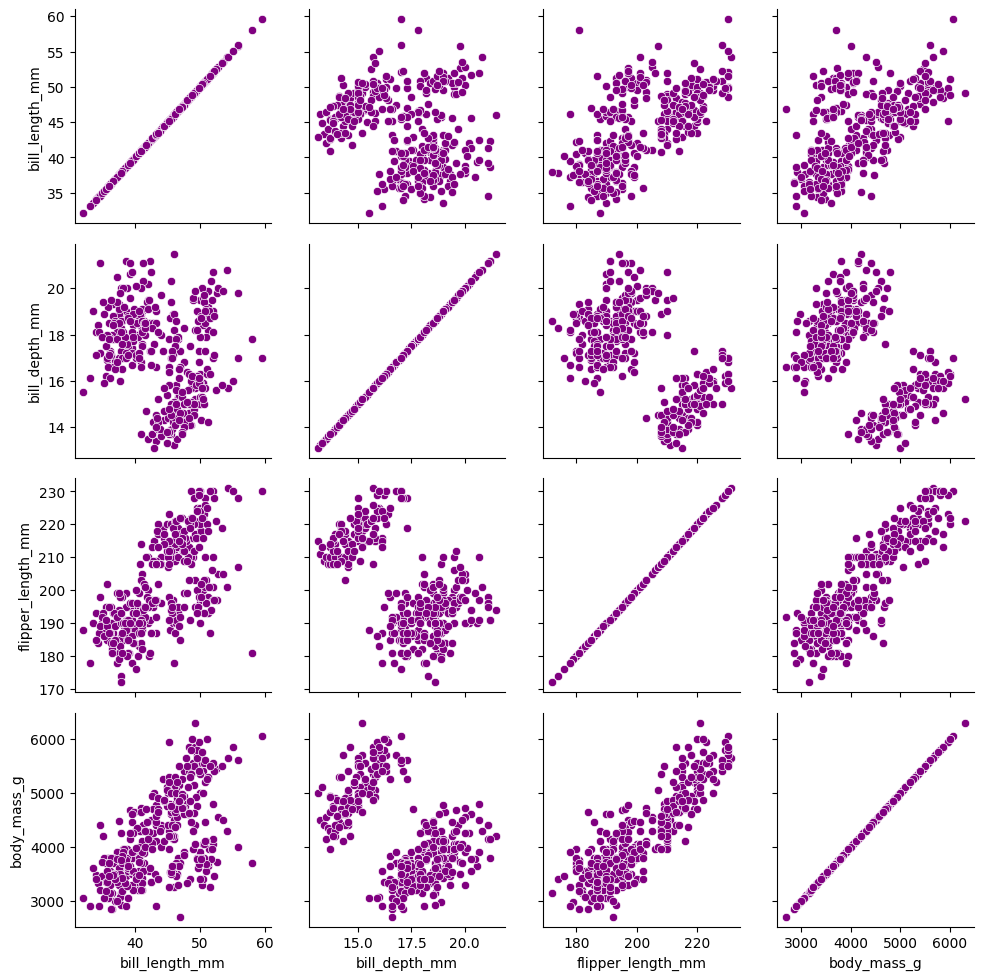

In [80]:
g = sns.PairGrid(penguins)
g.map(sns.scatterplot, color="purple");

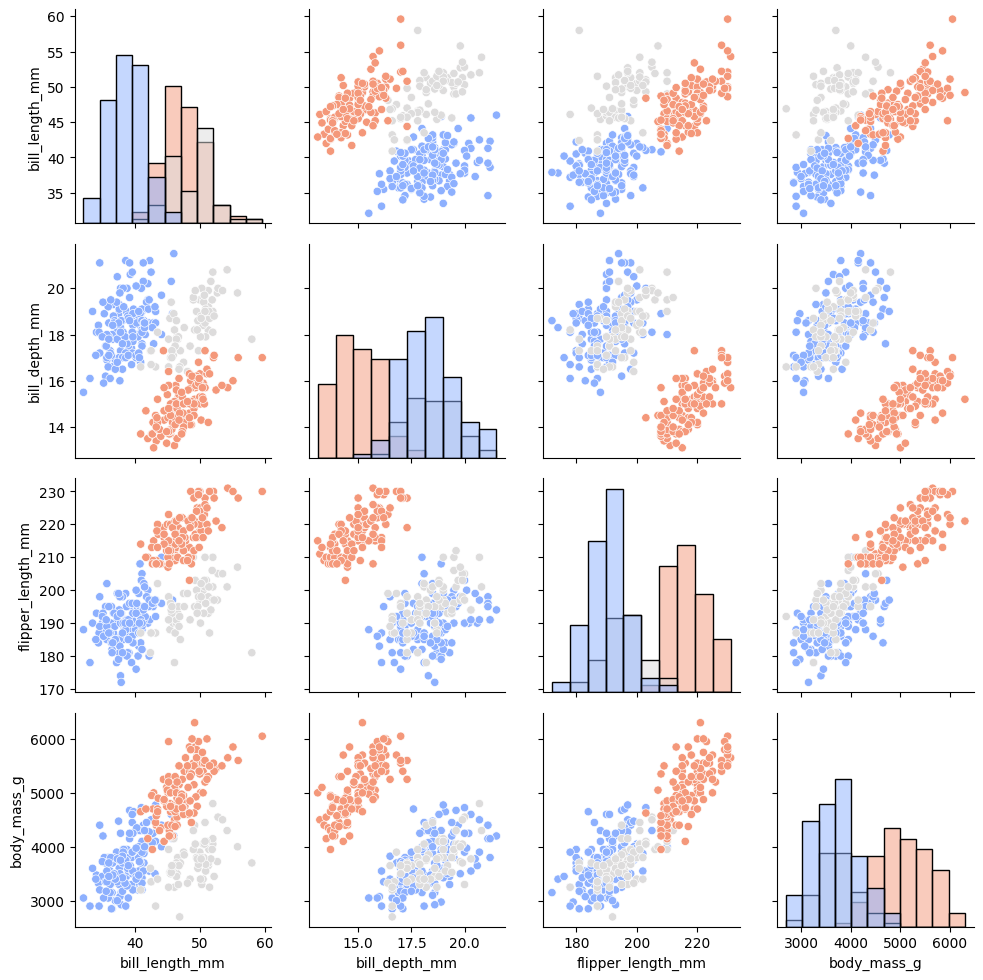

In [77]:
g = sns.PairGrid(penguins, hue="species", palette="coolwarm")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

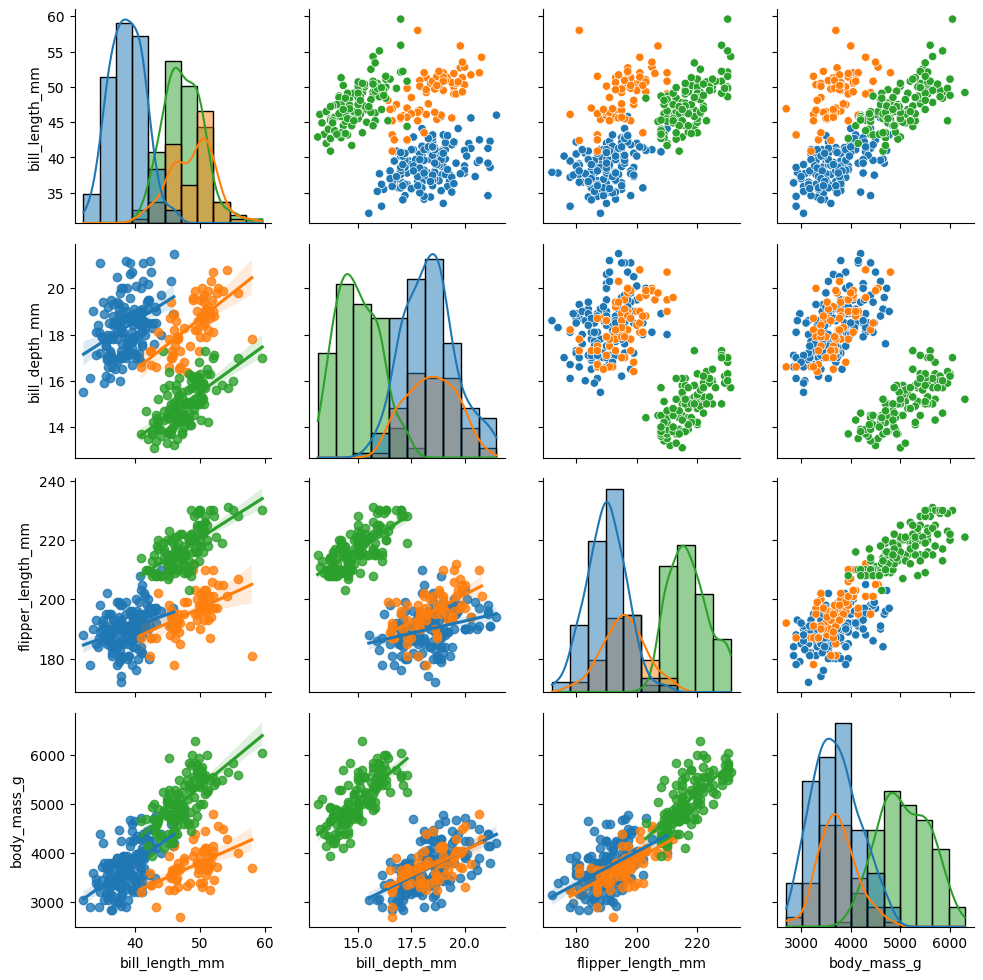

In [102]:
g = sns.PairGrid(penguins, diag_sharey=False, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.regplot)
g.map_diag(sns.histplot, kde=True);


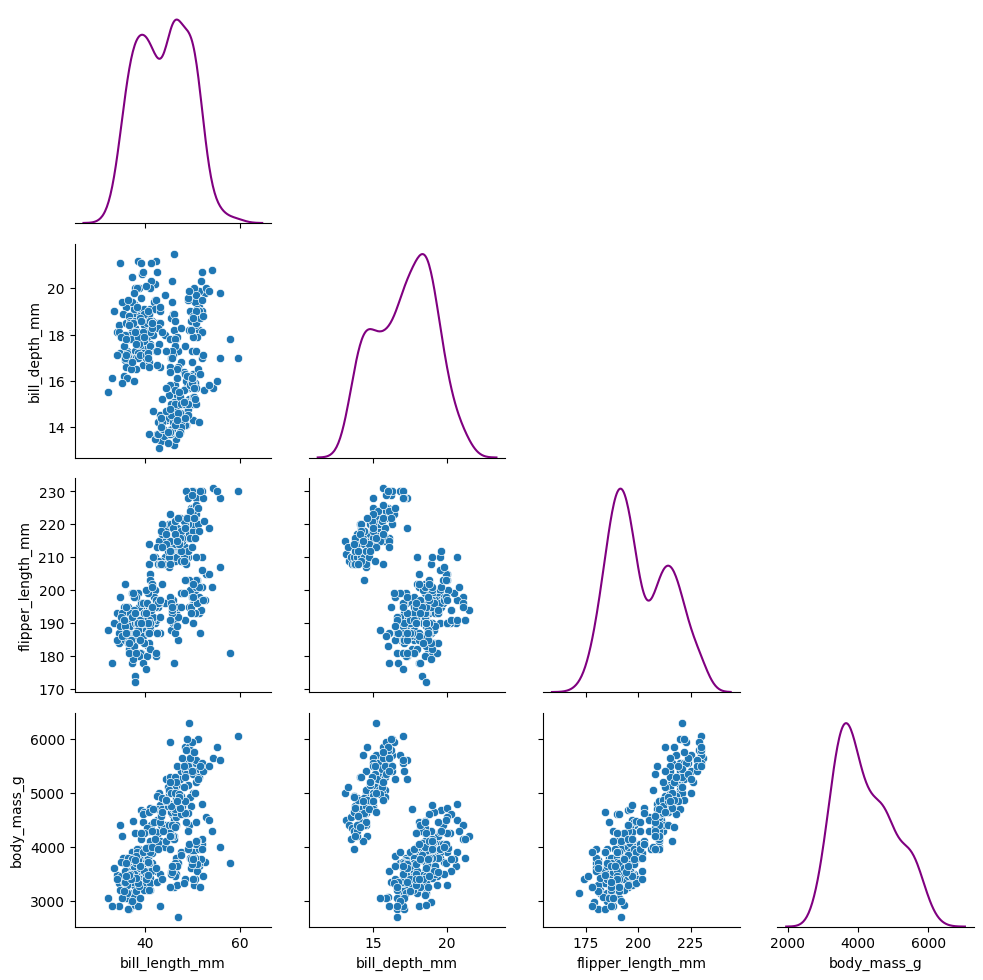

In [81]:
g = sns.PairGrid(penguins, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, color="purple");

The vars parameter can be used to control exactly which variables are used:

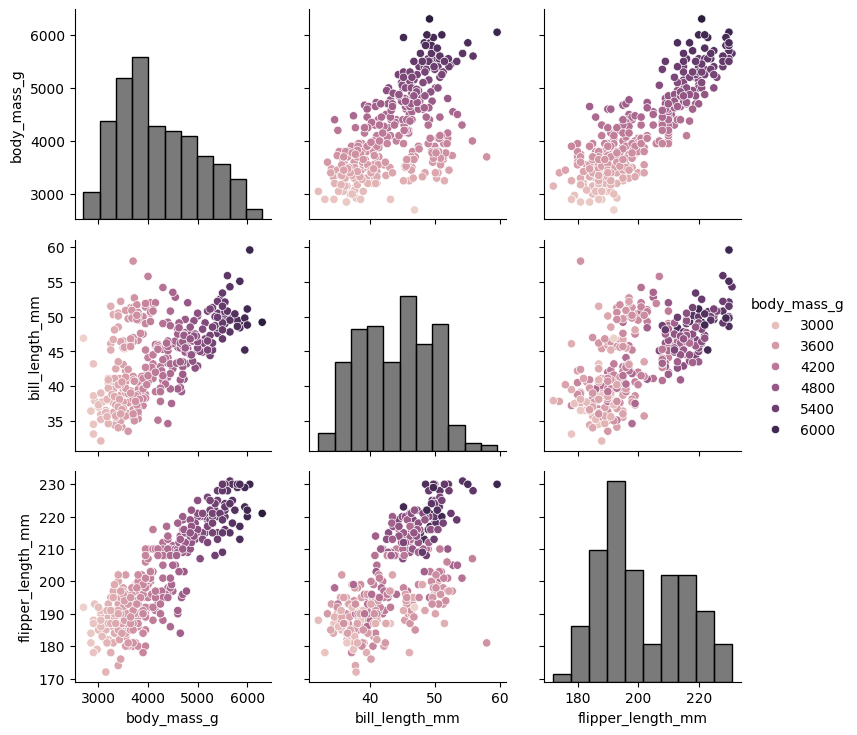

In [67]:
variables = ["body_mass_g", "bill_length_mm", "flipper_length_mm"]
g = sns.PairGrid(penguins, hue="body_mass_g", vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();

The plot need not be square: separate variables can be used to define the rows and columns:

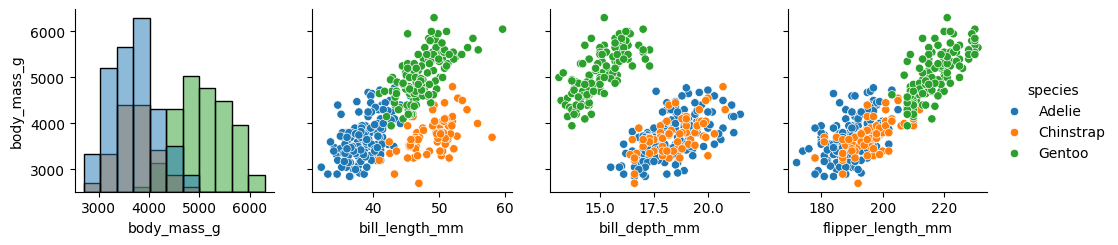

In [68]:
x_vars = ["body_mass_g", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
y_vars = ["body_mass_g"]
g = sns.PairGrid(penguins, hue="species", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();

# `jointplot`

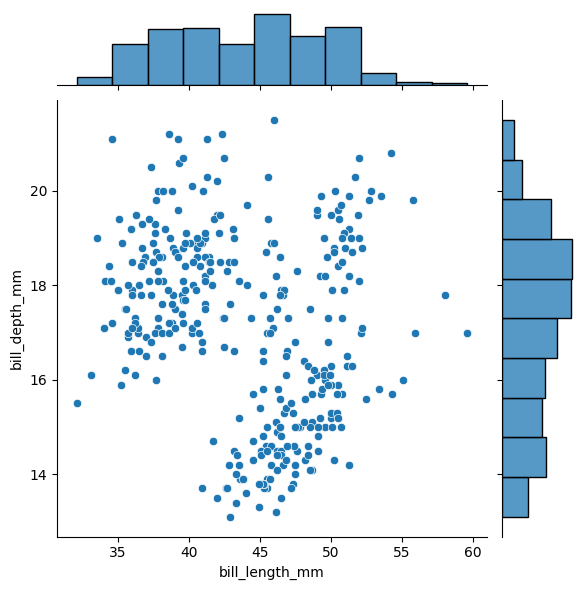

In [83]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm");

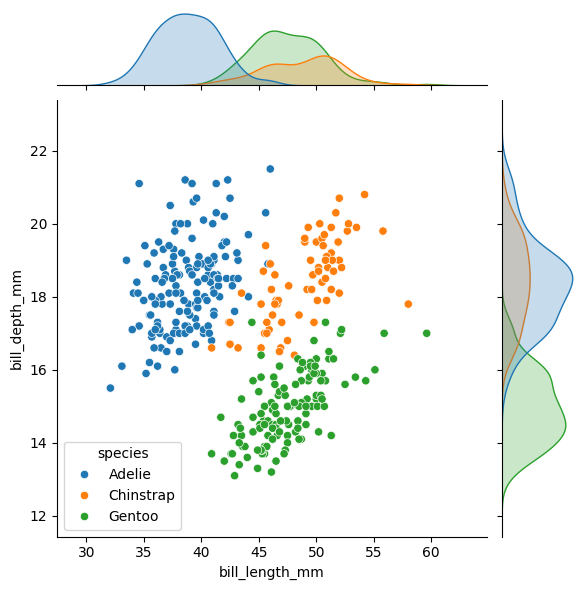

In [85]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species");

| `kind` Value | Description | Best For |
|-------------|------------|---------|
| `"scatter"` | Default scatter plot | General pairwise analysis |
| `"reg"` | Scatter + regression line | Identifying trends |
| `"hex"` | Hexbin plot | Large datasets with overplotting |
| `"kde"` | Density contours | Smoothed distributions |
| `"hist"` | 2D histogram | Large datasets with binning |


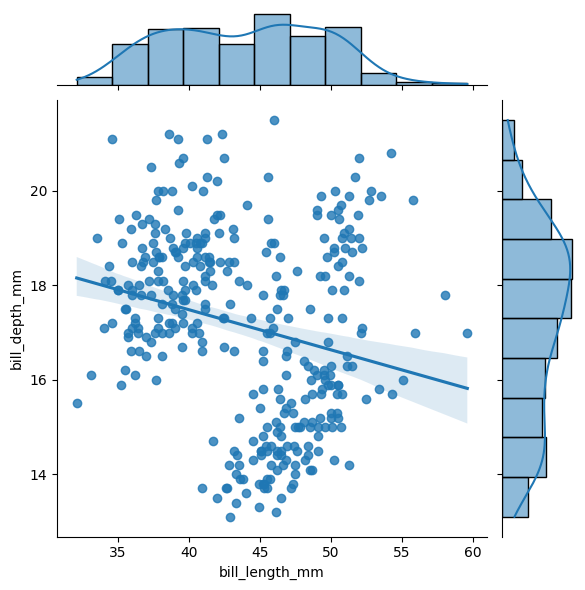

In [94]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg");

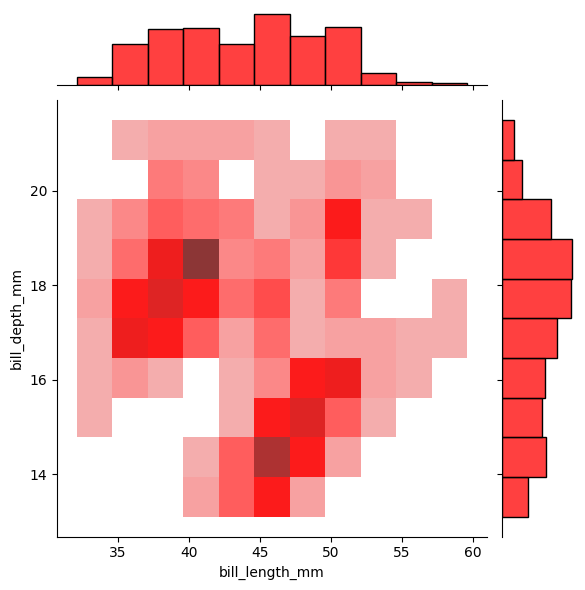

In [96]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hist", color='red');

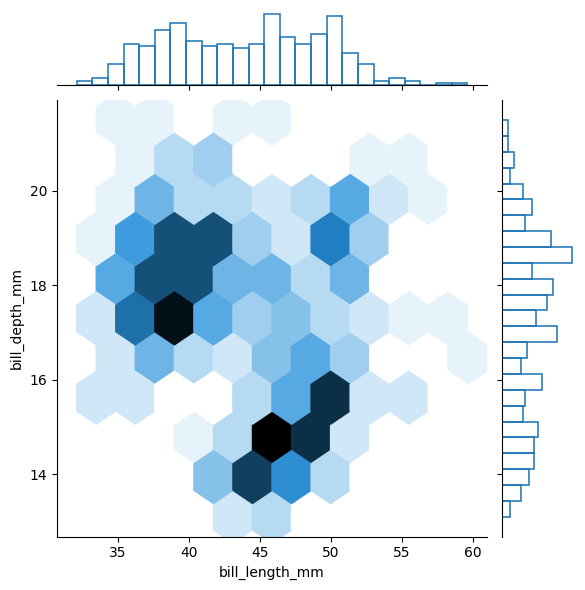

In [92]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex", marginal_kws=dict(bins=25, fill=False));

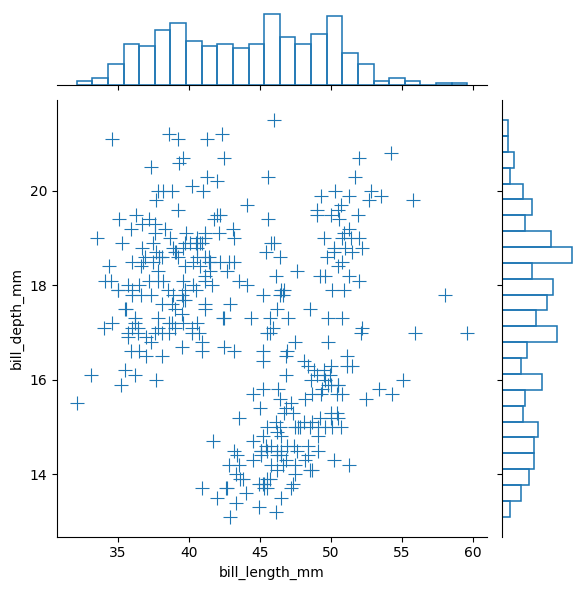

In [98]:
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
);

# `heatmap`

Heatmap is used to visualize correlation matrices, numerical data, or frequency counts in a structured color-coded format.

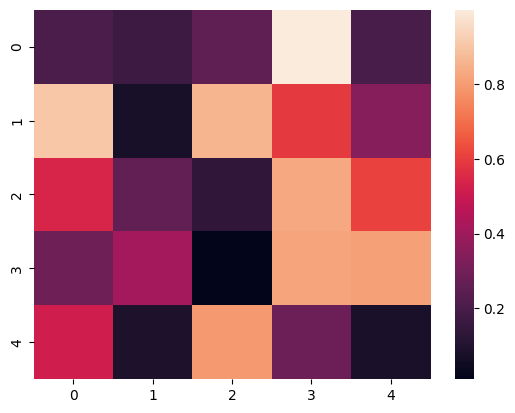

In [48]:
data = np.random.rand(5, 5)

sns.heatmap(data);

You can add numeric values inside the cells for better interpretation: `annot=True`

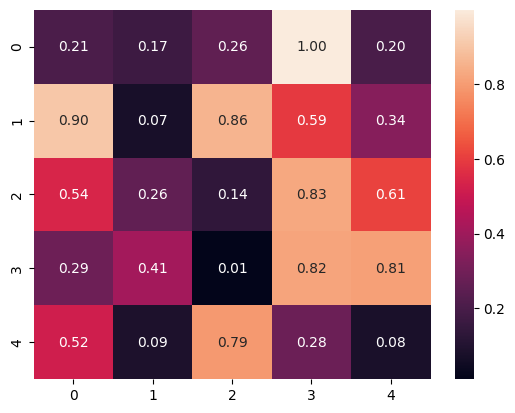

In [49]:
sns.heatmap(data, annot=True, fmt=".2f");

You can change the colormap to improve readability.

Common cmap options include:
- "coolwarm": Red to blue gradient.
- "viridis": Perceptually uniform (good for color-blind users).
- "Blues": Shades of blue.
- "YlGnBu": Yellow-green-blue gradient.

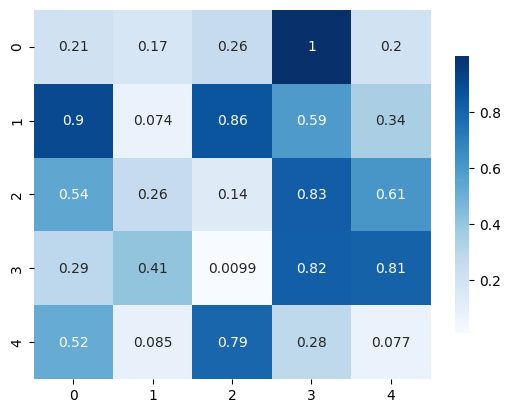

In [50]:
sns.heatmap(data, cmap="Blues", annot=True, cbar_kws=dict(shrink=.75));

Heatmaps are commonly used to visualize correlations between numerical variables.

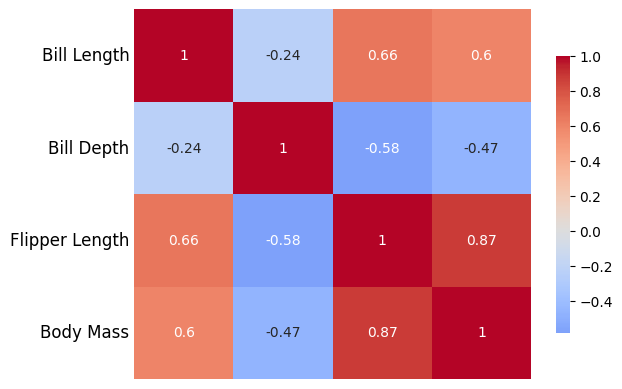

In [51]:
penguins = sns.load_dataset("penguins")

# Drop non-numeric columns
numeric_penguins = penguins.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_penguins.corr()

ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, cbar_kws=dict(shrink=.75));


ax.set_xticklabels([])
ax.set_yticklabels(["Bill Length", "Bill Depth", "Flipper Length", "Body Mass"], rotation=0, fontsize=12);

ax.tick_params(axis="both", length=0)